In [1]:
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## 1) in This Section We will start with the Data cleaning of the images in Our Dataset.

#### Use OpenCV to detect eyes and face in an image, if we have two eyes in the image, we keep the image, else we dicard the image

In [2]:
image = cv.imread('./test_image/MESSI.jpg')
image.shape

(498, 332, 3)

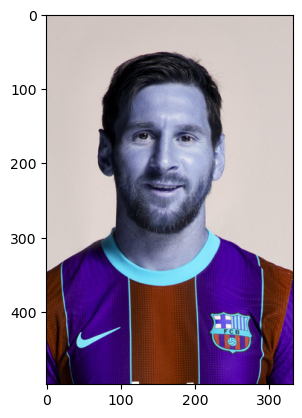

In [3]:
plt.imshow(image)

In [4]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray.shape

(498, 332)

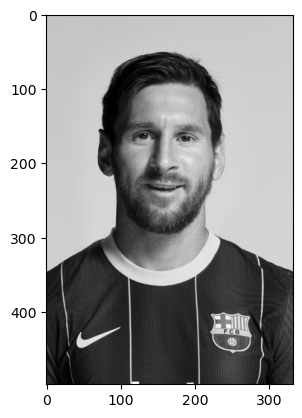

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./Haarcascades/haarcascade_eye.xml')

face = face_cascade.detectMultiScale(gray, 1.3, 5)
face

array([[ 80, 102, 162, 162]])

In [7]:
(x,y,w,h) = face[0]
x,y,w,h

(80, 102, 162, 162)

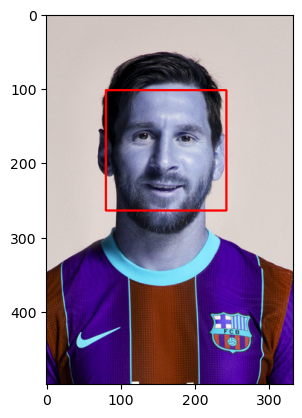

In [8]:
face_img = cv.rectangle(image,(x,y),(x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

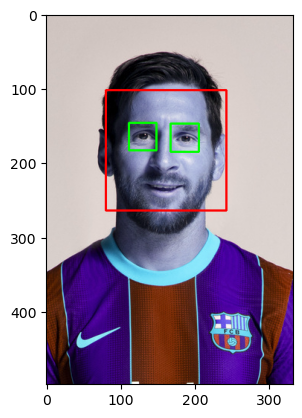

In [9]:
cv.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv.rectangle(face_img,(x,y),(x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

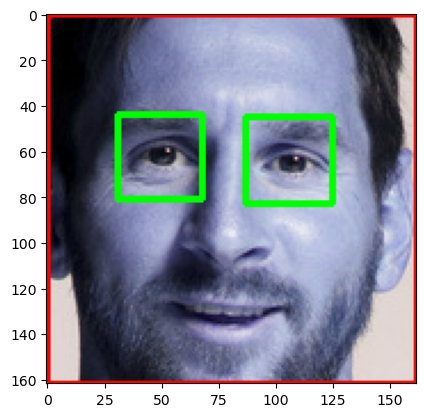

In [10]:
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

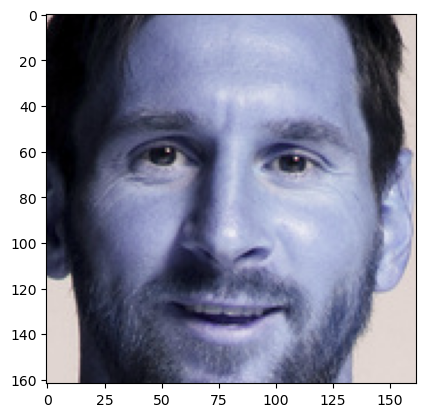

In [12]:
cropped_image = get_cropped_image('./test_image/MESSI.jpg')
plt.imshow(cropped_image)

In [28]:
path_to_data = "./image_dataset/"
path_to_cr_data = "./image_dataset/cropped_images/"

#### Get the file path name of each image set

In [29]:
#apend the file path names in an array
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['./image_dataset/lionel_messi',
 './image_dataset/russel_westbrook',
 './image_dataset/serena_williams']

 #### Create a new folder, to store the cropped images

In [31]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_colour = get_cropped_image(entry.path)
        if roi_colour is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv.imwrite(cropped_file_path, roi_colour)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    


lionel_messi
Generating cropped images in folder:  ./image_dataset/cropped_images/lionel_messi
russel_westbrook
Generating cropped images in folder:  ./image_dataset/cropped_images/russel_westbrook
serena_williams
Generating cropped images in folder:  ./image_dataset/cropped_images/serena_williams


## Feature Engineering

#### Wave length transform 

In [33]:
import pywt

In [34]:
# got function from stackoverflow
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

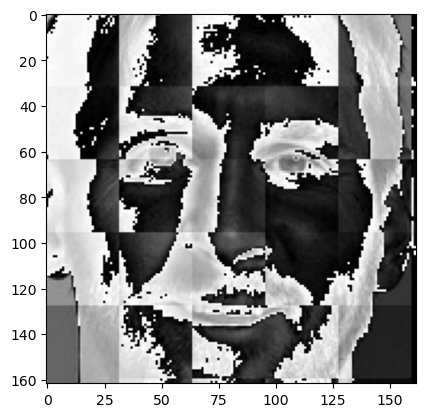

In [35]:
img_har = w2d(cropped_image,'db1',5)
plt.imshow(img_har, cmap='gray')

In [36]:
celebrity_file_names_dict

{'lionel_messi': ['./image_dataset/cropped_images/lionel_messi/lionel_messi1.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi2.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi3.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi4.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi5.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi6.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi7.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi8.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi9.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi10.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi11.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi12.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi13.png',
  './image_dataset/cropped_images/lionel_messi/lionel_messi14.png',
  './image_dataset/cropped_images/lionel_

In [38]:
#assign a number to each celeb
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0, 'russel_westbrook': 1, 'serena_williams': 2}

In [45]:
X = []
y = []

for celebrity_name, train_files in celebrity_file_names_dict.items():
    for train_img in train_files:
        img = cv.imread(train_img)
        scale_raw_img = cv.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scale_har_img = cv.resize(img_har, (32, 32))
        combine_img = np.vstack((scale_raw_img.reshape(32*32*3,1), scale_har_img.reshape(32*32,1)))
        X.append(combine_img)
        y.append(class_dict[celebrity_name])
        
        
        
        

In [47]:
len(X[0])

4096

In [48]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(57, 4096)

In [49]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

### Data cleaning Process is Complete. Now We train our Model

SVM Will be used with rbf kernel tuned with Heuristic finetuning

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5789473684210527

In [63]:
len(X_test)

19

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## In This section will we use GridSearch Cv to find out which alogrithm/model will have the highest predicition score.

In [77]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [78]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [80]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
    

,model,best_score,best_params
0,svm,0.825000,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.717857,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.800000,{'logisticregression__C': 1}


In [81]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [82]:
best_estimators['svm'].score(X_test, y_test)

0.5789473684210527

In [83]:
best_estimators['random_forest'].score(X_test, y_test)

0.5263157894736842

In [84]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.631578947368421

In [95]:
best_clf = best_estimators['logistic_regression']


In [96]:
from sklearn.metrics import confusion_matrix
conf_m = confusion_matrix(y_test, best_clf.predict(X_test))
conf_m

array([[6, 1, 2],
       [1, 3, 1],
       [2, 0, 3]], dtype=int64)

#### Our best prediction Model is a logistic Regression Model
##### The model score is 0.6315, which low prediction score.
Factors countrubuting to a low module scpre could be:
1. Not having enough pictures for the model to use.
2. Corrupt pictures.
3. model can't detect eyes in the pictures.

Text(95.72222222222221, 0.5, 'Truth')

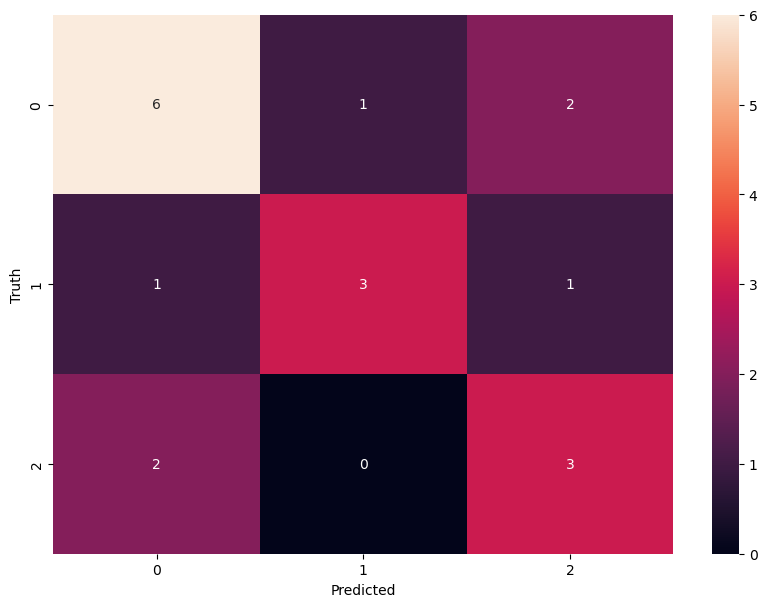

In [102]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(conf_m, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [98]:
!pip install jolib


In [103]:
class_dict

{'lionel_messi': 0, 'russel_westbrook': 1, 'serena_williams': 2}

### Save Trained model

In [100]:
import joblib 
joblib.dump(best_clf, 'post_model.pkl')

['post_model.pkl']

### Save class dictionary

In [101]:
import json

In [104]:
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))